In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import ShuffleSplit

from catboost import CatBoostRegressor
from catboost import Pool

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
df = pd.read_excel('Выборка_Казань.xlsx', sheet_name = 0)
df

,ID,Мусор,dup,outlier,out_PCA,Цена,Цена_перв,LN(Цена),BC(Цена),Цена_перв.1,...,Широта,Сцепка_к,Unnamed: 61,ПОИСК,Текст,Ремонт,Общая площадь,Год постройки,Этаж/Этажность,Ссылка
0,1_avito,0,0,0,0.0,5200000,5 200 000 ₽,15.464169,4.897233,NaN,...,55.852829,49.063304 55.852829,4.0,0.0,Продаю 1к квартиру-студию 27 квм в новом ЖК Но...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/kvartira-s...
1,2_avito,0,0,0,0.0,5390000,5 390 000 ₽,15.500056,4.899012,NaN,...,55.689431,49.206271 55.689431,3.0,0.0,Срочная Продажа Новой Квартиры- Студиипродаетс...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/kvartira-s...
2,3_avito,0,0,0,0.0,9500000,9 500 000 ₽,16.066802,4.925531,NaN,...,55.784501,49.193946 55.784501,32.0,0.0,Продается однокомнатная квартира по адресу Аль...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
3,4_avito,0,0,0,0.0,6000000,6 000 000 ₽,15.607270,4.904255,NaN,...,55.869248,49.09223 55.869248,45.0,0.0,Продается просторная однокомнатная квартира на...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
4,5_avito,0,0,0,0.0,8100000,8 100 000 ₽,15.907375,4.918363,NaN,...,55.795767,49.207753 55.795767,61.0,0.0,Продаётся просторная евро двухкомнатная в ЖК С...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11937,9389_avito,0,0,0,0.0,16000000,NaN,16.588099,NaN,NaN,...,55.777125,49.216709 55.777125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/3-k._kvart...
11938,9390_avito,0,0,0,0.0,11299999,NaN,16.240313,NaN,NaN,...,55.761041,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
11939,9391_avito,0,0,0,0.0,10199000,NaN,16.137800,NaN,NaN,...,55.761041,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
11940,9392_avito,0,0,0,0.0,11520000,NaN,16.259595,NaN,NaN,...,55.761041,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...


In [3]:
df = df[df['Мусор'] == 0]
df = df[df['outlier'] == 0]
df = df[df['dup'] == 0]
df = df[df['Многоуровневость'] == 0]
df = df[df['Терраса'] == 0]
df = df[df['Вид_2'] == 0]
df.reset_index(drop = True , inplace = True )
df

,ID,Мусор,dup,outlier,out_PCA,Цена,Цена_перв,LN(Цена),BC(Цена),Цена_перв.1,...,Широта,Сцепка_к,Unnamed: 61,ПОИСК,Текст,Ремонт,Общая площадь,Год постройки,Этаж/Этажность,Ссылка
0,1_avito,0,0,0,0.0,5200000,5 200 000 ₽,15.464169,4.897233,NaN,...,55.852829,49.063304 55.852829,4.0,0.0,Продаю 1к квартиру-студию 27 квм в новом ЖК Но...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/kvartira-s...
1,2_avito,0,0,0,0.0,5390000,5 390 000 ₽,15.500056,4.899012,NaN,...,55.689431,49.206271 55.689431,3.0,0.0,Срочная Продажа Новой Квартиры- Студиипродаетс...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/kvartira-s...
2,3_avito,0,0,0,0.0,9500000,9 500 000 ₽,16.066802,4.925531,NaN,...,55.784501,49.193946 55.784501,32.0,0.0,Продается однокомнатная квартира по адресу Аль...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
3,4_avito,0,0,0,0.0,6000000,6 000 000 ₽,15.607270,4.904255,NaN,...,55.869248,49.09223 55.869248,45.0,0.0,Продается просторная однокомнатная квартира на...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
4,5_avito,0,0,0,0.0,8100000,8 100 000 ₽,15.907375,4.918363,NaN,...,55.795767,49.207753 55.795767,61.0,0.0,Продаётся просторная евро двухкомнатная в ЖК С...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9498,9389_avito,0,0,0,0.0,16000000,NaN,16.588099,NaN,NaN,...,55.777125,49.216709 55.777125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/3-k._kvart...
9499,9390_avito,0,0,0,0.0,11299999,NaN,16.240313,NaN,NaN,...,55.761041,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
9500,9391_avito,0,0,0,0.0,10199000,NaN,16.137800,NaN,NaN,...,55.761041,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
9501,9392_avito,0,0,0,0.0,11520000,NaN,16.259595,NaN,NaN,...,55.761041,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...


In [4]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Этаж_4']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,ID,Мусор,dup,outlier,out_PCA,Цена,Цена_перв,LN(Цена),BC(Цена),Цена_перв.1,...,Год постройки,Этаж/Этажность,Ссылка,Этаж_4_более_25,Этаж_4_неважно,Этаж_4_первый,Этаж_4_последний,Этаж_4_этажи_11-25,Этаж_4_этажи_2-5,Этаж_4_этажи_6-10
0,1_avito,0,0,0,0.0,5200000,5 200 000 ₽,15.464169,4.897233,NaN,...,NaN,NaN,https://www.avito.ru/kazan/kvartiry/kvartira-s...,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2_avito,0,0,0,0.0,5390000,5 390 000 ₽,15.500056,4.899012,NaN,...,NaN,NaN,https://www.avito.ru/kazan/kvartiry/kvartira-s...,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3_avito,0,0,0,0.0,9500000,9 500 000 ₽,16.066802,4.925531,NaN,...,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4_avito,0,0,0,0.0,6000000,6 000 000 ₽,15.607270,4.904255,NaN,...,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5_avito,0,0,0,0.0,8100000,8 100 000 ₽,15.907375,4.918363,NaN,...,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9498,9389_avito,0,0,0,0.0,16000000,NaN,16.588099,NaN,NaN,...,NaN,NaN,https://www.avito.ru/kazan/kvartiry/3-k._kvart...,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9499,9390_avito,0,0,0,0.0,11299999,NaN,16.240313,NaN,NaN,...,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9500,9391_avito,0,0,0,0.0,10199000,NaN,16.137800,NaN,NaN,...,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9501,9392_avito,0,0,0,0.0,11520000,NaN,16.259595,NaN,NaN,...,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Ремонт_2']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,ID,Мусор,dup,outlier,out_PCA,Цена,Цена_перв,LN(Цена),BC(Цена),Цена_перв.1,...,Этаж_4_последний,Этаж_4_этажи_11-25,Этаж_4_этажи_2-5,Этаж_4_этажи_6-10,Ремонт_2_без_отделки,Ремонт_2_дизайнерский,Ремонт_2_косметический,Ремонт_2_предчистовая,Ремонт_2_современный_ремонт,Ремонт_2_требует_ремонта
0,1_avito,0,0,0,0.0,5200000,5 200 000 ₽,15.464169,4.897233,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2_avito,0,0,0,0.0,5390000,5 390 000 ₽,15.500056,4.899012,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3_avito,0,0,0,0.0,9500000,9 500 000 ₽,16.066802,4.925531,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4_avito,0,0,0,0.0,6000000,6 000 000 ₽,15.607270,4.904255,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5_avito,0,0,0,0.0,8100000,8 100 000 ₽,15.907375,4.918363,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9498,9389_avito,0,0,0,0.0,16000000,NaN,16.588099,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9499,9390_avito,0,0,0,0.0,11299999,NaN,16.240313,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9500,9391_avito,0,0,0,0.0,10199000,NaN,16.137800,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9501,9392_avito,0,0,0,0.0,11520000,NaN,16.259595,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Раст_метро_2']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,ID,Мусор,dup,outlier,out_PCA,Цена,Цена_перв,LN(Цена),BC(Цена),Цена_перв.1,...,Этаж_4_этажи_6-10,Ремонт_2_без_отделки,Ремонт_2_дизайнерский,Ремонт_2_косметический,Ремонт_2_предчистовая,Ремонт_2_современный_ремонт,Ремонт_2_требует_ремонта,Раст_метро_2_на_удалении,Раст_метро_2_неважно,Раст_метро_2_рядом
0,1_avito,0,0,0,0.0,5200000,5 200 000 ₽,15.464169,4.897233,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2_avito,0,0,0,0.0,5390000,5 390 000 ₽,15.500056,4.899012,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3_avito,0,0,0,0.0,9500000,9 500 000 ₽,16.066802,4.925531,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,4_avito,0,0,0,0.0,6000000,6 000 000 ₽,15.607270,4.904255,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,5_avito,0,0,0,0.0,8100000,8 100 000 ₽,15.907375,4.918363,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9498,9389_avito,0,0,0,0.0,16000000,NaN,16.588099,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9499,9390_avito,0,0,0,0.0,11299999,NaN,16.240313,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9500,9391_avito,0,0,0,0.0,10199000,NaN,16.137800,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9501,9392_avito,0,0,0,0.0,11520000,NaN,16.259595,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [7]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Раст_центр_2']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,ID,Мусор,dup,outlier,out_PCA,Цена,Цена_перв,LN(Цена),BC(Цена),Цена_перв.1,...,Ремонт_2_современный_ремонт,Ремонт_2_требует_ремонта,Раст_метро_2_на_удалении,Раст_метро_2_неважно,Раст_метро_2_рядом,Раст_центр_2_более_10000,Раст_центр_2_до_2000,Раст_центр_2_от_2000_до_4000,Раст_центр_2_от_4000_до_6000,Раст_центр_2_от_6000_до_10000
0,1_avito,0,0,0,0.0,5200000,5 200 000 ₽,15.464169,4.897233,NaN,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2_avito,0,0,0,0.0,5390000,5 390 000 ₽,15.500056,4.899012,NaN,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3_avito,0,0,0,0.0,9500000,9 500 000 ₽,16.066802,4.925531,NaN,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4_avito,0,0,0,0.0,6000000,6 000 000 ₽,15.607270,4.904255,NaN,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5_avito,0,0,0,0.0,8100000,8 100 000 ₽,15.907375,4.918363,NaN,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9498,9389_avito,0,0,0,0.0,16000000,NaN,16.588099,NaN,NaN,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9499,9390_avito,0,0,0,0.0,11299999,NaN,16.240313,NaN,NaN,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9500,9391_avito,0,0,0,0.0,10199000,NaN,16.137800,NaN,NaN,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9501,9392_avito,0,0,0,0.0,11520000,NaN,16.259595,NaN,NaN,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Районы_2']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,ID,Мусор,dup,outlier,out_PCA,Цена,Цена_перв,LN(Цена),BC(Цена),Цена_перв.1,...,Районы_2_Соцгород,Районы_2_Старотатарская_Суконная,Районы_2_Старый_Ново_Савиновский,Районы_2_Танкодром,Районы_2_Усады,Районы_2_Царево,Районы_2_Царицыно,Районы_2_Центр,Районы_2_Ягодная_слобода,Районы_2_поселок_Урицкого
0,1_avito,0,0,0,0.0,5200000,5 200 000 ₽,15.464169,4.897233,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2_avito,0,0,0,0.0,5390000,5 390 000 ₽,15.500056,4.899012,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3_avito,0,0,0,0.0,9500000,9 500 000 ₽,16.066802,4.925531,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4_avito,0,0,0,0.0,6000000,6 000 000 ₽,15.607270,4.904255,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5_avito,0,0,0,0.0,8100000,8 100 000 ₽,15.907375,4.918363,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9498,9389_avito,0,0,0,0.0,16000000,NaN,16.588099,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9499,9390_avito,0,0,0,0.0,11299999,NaN,16.240313,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9500,9391_avito,0,0,0,0.0,10199000,NaN,16.137800,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9501,9392_avito,0,0,0,0.0,11520000,NaN,16.259595,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['ЖК_БД_En'] = encoder.fit_transform(df[['ЖК_БД']])
df

C:\Users\Silm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,ID,Мусор,dup,outlier,out_PCA,Цена,Цена_перв,LN(Цена),BC(Цена),Цена_перв.1,...,Районы_2_Старотатарская_Суконная,Районы_2_Старый_Ново_Савиновский,Районы_2_Танкодром,Районы_2_Усады,Районы_2_Царево,Районы_2_Царицыно,Районы_2_Центр,Районы_2_Ягодная_слобода,Районы_2_поселок_Урицкого,ЖК_БД_En
0,1_avito,0,0,0,0.0,5200000,5 200 000 ₽,15.464169,4.897233,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2_avito,0,0,0,0.0,5390000,5 390 000 ₽,15.500056,4.899012,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,3_avito,0,0,0,0.0,9500000,9 500 000 ₽,16.066802,4.925531,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4_avito,0,0,0,0.0,6000000,6 000 000 ₽,15.607270,4.904255,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,5_avito,0,0,0,0.0,8100000,8 100 000 ₽,15.907375,4.918363,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9498,9389_avito,0,0,0,0.0,16000000,NaN,16.588099,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9499,9390_avito,0,0,0,0.0,11299999,NaN,16.240313,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9500,9391_avito,0,0,0,0.0,10199000,NaN,16.137800,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9501,9392_avito,0,0,0,0.0,11520000,NaN,16.259595,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [10]:
list(df.columns)

['ID',
 'Мусор',
 'dup',
 'outlier',
 'out_PCA',
 'Цена',
 'Цена_перв',
 'LN(Цена)',
 'BC(Цена)',
 'Цена_перв.1',
 'Цена(кв.м)',
 'Цена(кв.м)_ln',
 'Прогноз',
 'кв.м',
 'MAE',
 'MAPE',
 'Исп',
 'Комм',
 'ОПлощадь',
 'Этаж_1',
 'Этаж_2',
 'Этаж_3',
 'Этаж_4',
 'Этажность_1',
 'ГП_1',
 'ГП_2',
 'Неточности',
 'ГП',
 'Unnamed: 28',
 'Unnamed: 29',
 'Разница',
 'Испол',
 'Ремонт_1',
 'Ремонт_2',
 'Раст_центр_1',
 'Раст_центр_2',
 'Раст_метро_1',
 'Раст_метро_2',
 'Районы_1',
 'Районы_2',
 'Районы_3',
 'Районы_4',
 'Районы_5',
 'Medians',
 'ЖК_БД',
 'ЖК_БД_ч',
 'Многоуровневость',
 'Терраса',
 'Вид_1',
 'Вид_2',
 'DB',
 'KM',
 'Аварийноть',
 'Проверка',
 'Инфо',
 'Адрес_1',
 'Адрес_2',
 'Адрес_Ya',
 'Долгота',
 'Широта',
 'Сцепка_к',
 'Unnamed: 61',
 'ПОИСК',
 'Текст',
 'Ремонт',
 'Общая площадь',
 'Год постройки',
 'Этаж/Этажность',
 'Ссылка',
 'Этаж_4_более_25',
 'Этаж_4_неважно',
 'Этаж_4_первый',
 'Этаж_4_последний',
 'Этаж_4_этажи_11-25',
 'Этаж_4_этажи_2-5',
 'Этаж_4_этажи_6-10',
 'Ре

In [11]:
X = df[[
         'ОПлощадь',
         'Этажность_1',
         'ГП_2',
         'Этаж_4_более_25',
         'Этаж_4_неважно',
         'Этаж_4_первый',
         'Этаж_4_последний',
         'Этаж_4_этажи_11-25',
         'Этаж_4_этажи_2-5',
         'Этаж_4_этажи_6-10',
         'Ремонт_2_без_отделки',
         'Ремонт_2_дизайнерский',
         'Ремонт_2_косметический',
         'Ремонт_2_предчистовая',
         'Ремонт_2_современный_ремонт',
         'Ремонт_2_требует_ремонта',
         'Раст_метро_2_на_удалении',
         'Раст_метро_2_неважно',
         'Раст_метро_2_рядом',
         'Раст_центр_2_более_10000',
         'Раст_центр_2_до_2000',
         'Раст_центр_2_от_2000_до_4000',
         'Раст_центр_2_от_4000_до_6000',
         'Раст_центр_2_от_6000_до_10000',
         'Районы_2_Адмиралтейская_слобода',
         'Районы_2_Азино',
         'Районы_2_Вблизи_центра',
         'Районы_2_Высокая_гора',
         'Районы_2_Горки',
         'Районы_2_Городские_поселки',
         'Районы_2_Дербышки',
         'Районы_2_Жилплощадка_Новое_Караваево',
         'Районы_2_Залесный',
         'Районы_2_Зоопарк',
         'Районы_2_Калуга_Аметьево',
         'Районы_2_Караваево',
         'Районы_2_Квартал_42',
         'Районы_2_Квартал_56_Третий',
         'Районы_2_Кварталы',
         'Районы_2_Клыковка_Дальний',
         'Районы_2_Красная_горка_Юдино',
         'Районы_2_Куюки',
         'Районы_2_Левченко',
         'Районы_2_Левый_Берег',
         'Районы_2_Осиново',
         'Районы_2_Пороховая_слобода',
         'Районы_2_Речной_Порт',
         'Районы_2_Свердлова',
         'Районы_2_Сокуры',
         'Районы_2_Солнечный_Город',
         'Районы_2_Соцгород',
         'Районы_2_Старотатарская_Суконная',
         'Районы_2_Старый_Ново_Савиновский',
         'Районы_2_Танкодром',
         'Районы_2_Усады',
         'Районы_2_Царево',
         'Районы_2_Царицыно',
         'Районы_2_Центр',
         'Районы_2_Ягодная_слобода',
         'Районы_2_поселок_Урицкого',
         'ЖК_БД_En'  
       ]]

Y = df['LN(Цена)']

In [14]:
catb = CatBoostRegressor(iterations = 7000, #максимальное количество построенных деревьев
                         random_seed = 5, 
                         learning_rate = 0.01, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
                         max_depth = 6, #глубина дерева
                         #boosting_type = 'Ordered', #может дать хорошее качество при малых выборках, работает медленно
                         #l2_leaf_reg = 10, #коэффициент при члене регуляризации L2 функции потерь
                         #bagging_temperature = 1,
                         #random_strength = 1,
                         one_hot_max_size = 40, #не используем one hot encoding, а включаем one_hot_max_size
                         #loss_function = 'MAE', #по умолчанию
                         #eval_metric = 'MAPE', #MAPE
                         od_type = 'Iter', #если модель переобучилась
                         od_wait = 5,
                         verbose = False) #делай остановку через 20 итераций

In [15]:
shuffle_split = ShuffleSplit(n_splits = 5, test_size = 0.05, random_state = 0)

train_sizes, train_scores, test_scores = learning_curve(
                                                        catb,
                                                        X, 
                                                        Y,
                                                        cv = shuffle_split,
                                                        scoring = 'neg_root_mean_squared_error',
                                                        train_sizes = np.linspace(0.05, 0.95, 20, endpoint = True),
                                                        #train_sizes = np.linspace(0.05, 0.95, 20) * 7586,
                                                        #train_sizes = [0.05, 0.1, 0.15, 0.2, 0.25, 
                                                        #               0.3, 0.35, 0.4, 0.45, 0.50, 
                                                        #               0.55, 0.6, 0.65, 0.7, 0.75, 
                                                        #               0.8, 0.85, 0.9, 0.95],
                                                        verbose = False
                                                        )
#максимальный train_sizes будет зависить от cv, где устанавливается фиксированный размер testa, сейчас он = 10%
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

<function matplotlib.pyplot.show(close=None, block=None)>

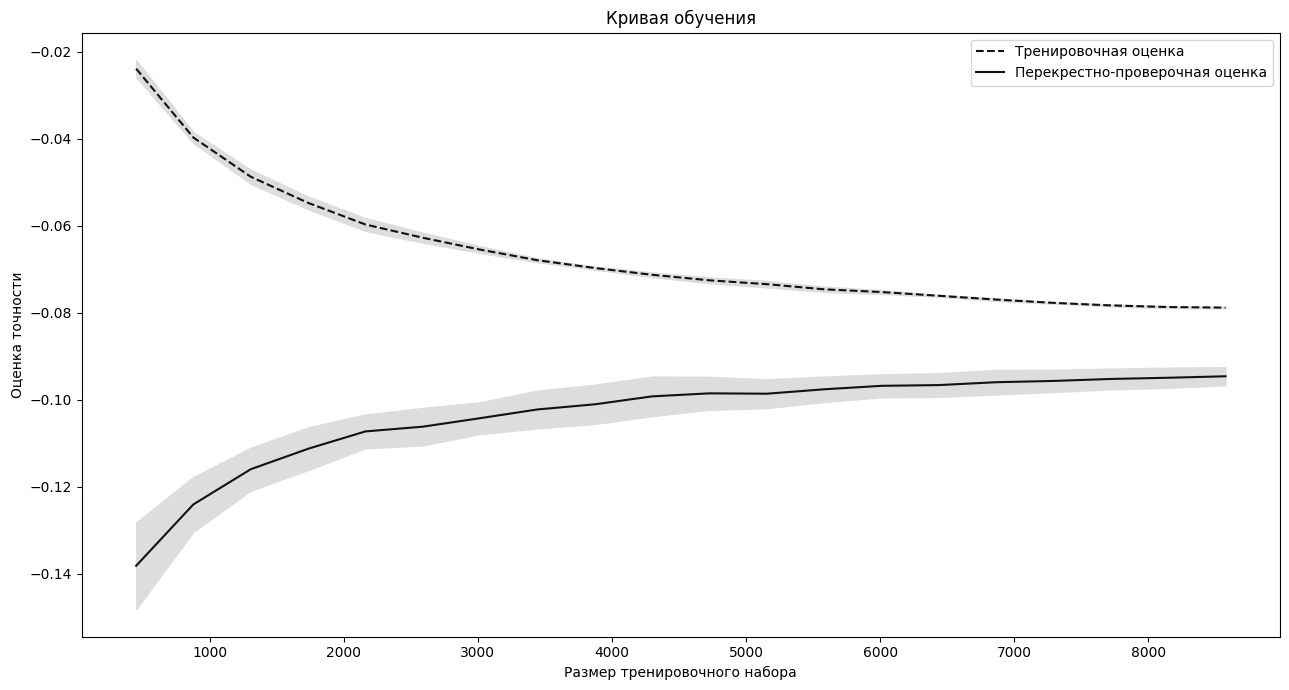

In [16]:
plt.figure(figsize = (13, 7))
plt.plot(train_sizes, train_mean, '--', color = "#111111",
         label = "Тренировочная оценка")
plt.plot(train_sizes, test_mean, color = "#111111",
         label = "Перекрестно-проверочная оценка")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = "#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color = "#DDDDDD")

plt.title("Кривая обучения")
plt.xlabel("Размер тренировочного набора")
plt.ylabel("Оценка точности")
plt.legend(loc = "best")
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

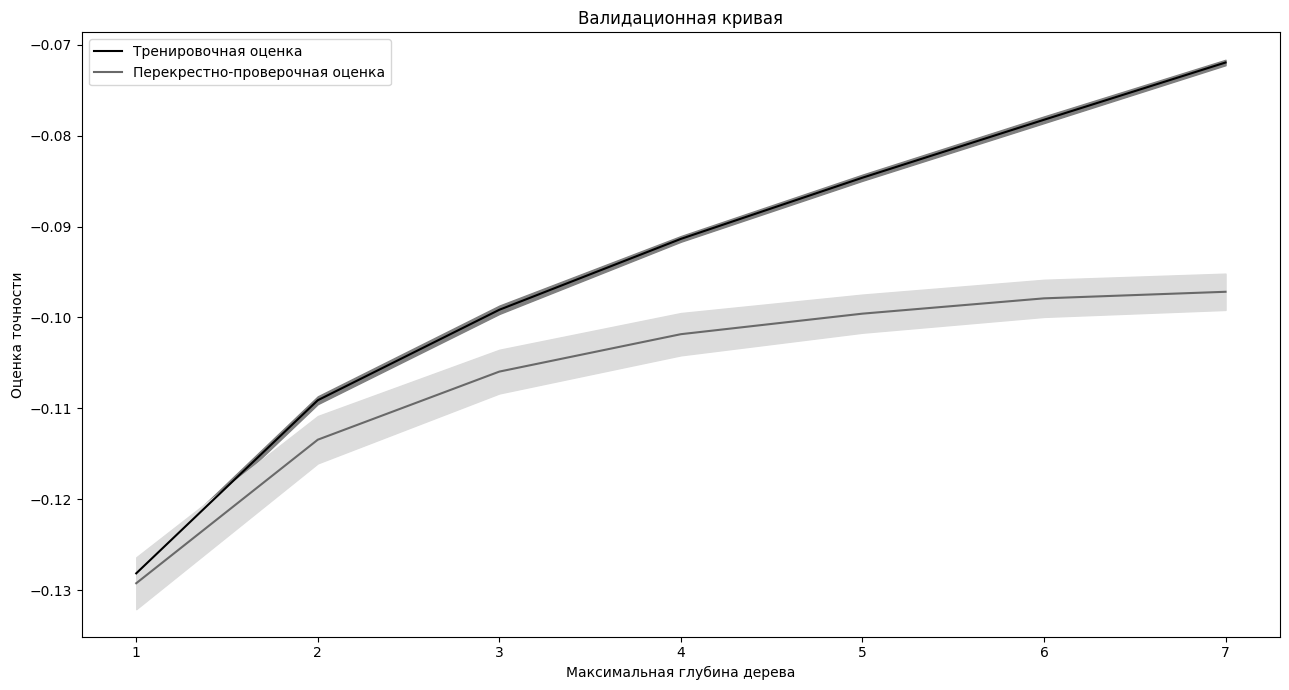

In [17]:
shuffle_split = ShuffleSplit(n_splits = 5, test_size = 0.15, random_state = 0)
param_range = np.arange(1, 8, 1)

train_scores, test_scores = validation_curve(
                                             catb,
                                             X, 
                                             Y,
                                             cv = shuffle_split,
                                             scoring = 'neg_root_mean_squared_error',
                                             param_name = "max_depth",
                                             param_range = param_range,
                                             n_jobs = -1,
                                             verbose = False
                                            )

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.figure(figsize = (13, 7))
plt.plot(param_range, train_mean, color = "black",
         label = "Тренировочная оценка")
plt.plot(param_range, test_mean, color = "dimgrey",
         label = "Перекрестно-проверочная оценка")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color = "gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color = "gainsboro")

plt.title("Валидационная кривая")
plt.xlabel("Максимальная глубина дерева")
plt.ylabel("Оценка точности")
plt.legend(loc = "best")
plt.tight_layout()
plt.show